## Analysis of Bank Marketing Data set

**Executive Summary**

This analysis was performed as a solution to a data challenge as part of the interview process for the position of a data solutions analyst at Rocket Mortgage loans. The data set relates to the results of a bank marketing campaign to encourage clients to subscribe to a term deposit. The data included information on some client demographic variables, variables relating to extent of contact with the client and some economic variables. The task was to explore the data for patterns, evaluate the performance of an already deployed model and possibly come up with a model with a higher performance.

The data set contains 41,188 rows and 22 columns of data, with 88% of the clients electing not to subscribe to a term deposit. the exploratory data analysis suggests that client's marital status and educational attainment have little to no effect on the probability of being subscribed to a term deposit. However, older clients and those who had previously subscribed to a term deposit following earlier marketing campaigns may be more likely to subscribe. Also, clients are less likely to subscribe to a term deposit when the consumer price index is higher. In other words, when inflation rises, assets such as term deposits tend to lose value as they are not protected against inflation. Hence, most people would rather invest in inflation-linked bonds or floating-rate coupon bonds or equities which tend to compensate for rising general prices of goods and services.

In evaluating the deployed model, I can conclude that the model has a very low accuracy score and precision value. However, it has a high recall value, but then overall it has a low f1-score. By comparison, the simple logistic regression I built had a slightly higher f1-score and might be preferred to the deployed model.

**Importing Libraries**

In [1]:
# Importing basic useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading and eyeballing the data set**

In [2]:
# Reading in the bank marketing campaign data set (in a csv file) into a pandas dataframe
Marketing_data = pd.read_csv('DSA Data Set.csv')

In [3]:
# Eyeballing the data
Marketing_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [4]:
# Checking details of the data, like number of rows, columns and variable data types
Marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age                41188 non-null int64
job                41188 non-null object
marital            41188 non-null object
education          41188 non-null object
default            41188 non-null object
housing            41188 non-null object
loan               41188 non-null object
contact            41188 non-null object
month              41188 non-null object
day_of_week        41188 non-null object
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null object
emp.var.rate       41188 non-null float64
cons.price.idx     41188 non-null float64
cons.conf.idx      41188 non-null float64
euribor3m          41188 non-null float64
nr.employed        41188 non-null float64
ModelPrediction    41188 non-null float64
y                  41188 non-

The summary above confirms that the data set contains 41,188 rows and 22 columns of data. I can also confirm that all the variables are of the correct data type, with continuous numerous variables represented as floats, discrete numeric variables represented as integer data type and categorical variables represented as object data type. The summary above also suggests that there are no missing values in the data set.

**Exploratory Data Analysis**

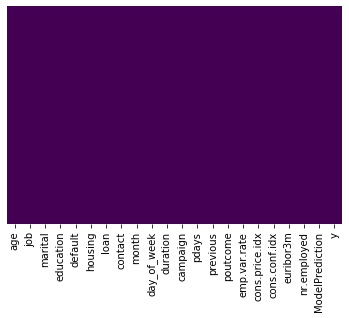

In [5]:
# Checking for missing values by creating a simple heatmap of the data

sns.heatmap(Marketing_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As expected the heatmap is blank indicating that there are no missing values in the data set.

Next, I would make more plots to explore patterns in the data.

First, I would like to examine the frequency distribution of the response variable y, which represents whether a client subscribed to a term deposit or not.

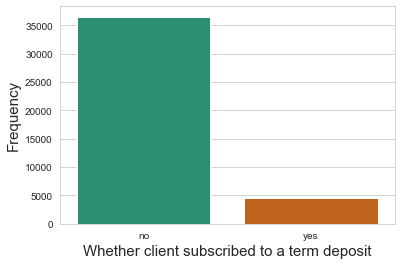

In [6]:
# A simple count plot in the Seaborn package can help produce a barplot of the response variable

sns.set_style('whitegrid')
Plot_resp = sns.countplot(x='y',data=Marketing_data,palette='Dark2')
Plot_resp.set_xlabel('Whether client subscribed to a term deposit',fontsize=15);
Plot_resp.set_ylabel('Frequency',fontsize=15)

plt.savefig('Plot_y', dpi = 600)

In [7]:
# I can also check to see the actual counts of each response variable category as follows

Marketing_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

So far, we can conclude that most of the clients contacted during the marketing campaign opted not to subscribe to a term deposit.

Next, I would try to make plots that explore the relationship between the response variable and some of the explanatory variables.

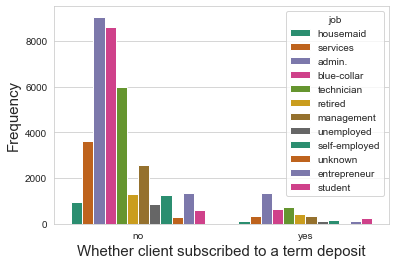

In [8]:
# Examining the distribution of the response variable grouped by client's occupation

ploty_job = sns.countplot(x='y', hue='job', data=Marketing_data, palette='Dark2')
ploty_job.set_xlabel('Whether client subscribed to a term deposit',fontsize=15);
ploty_job.set_ylabel('Frequency',fontsize=15)

plt.savefig('ploty_job', dpi = 600)

The plot above shows a somewhat similar distribution of clients that subscribed to a term deposit and those that did not when accounting for differences in occupational groups. Clients in admin roles are the most likely to subscribe to a term deposit and are also the most likely not to subscribe.

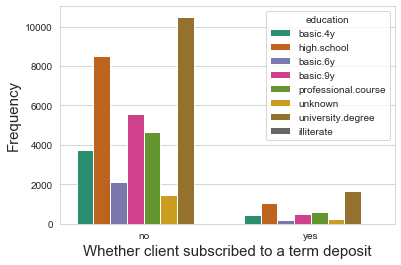

In [9]:
# Examining the distribution of the response variable grouped by client's educational attainment

ploty_job = sns.countplot(x='y', hue='education', data=Marketing_data, palette='Dark2')
ploty_job.set_xlabel('Whether client subscribed to a term deposit',fontsize=15);
ploty_job.set_ylabel('Frequency',fontsize=15)

plt.savefig('ploty_edu', dpi = 600)

Similarly, clients with university degrees are the largest group of those that subscribed and those that did not.

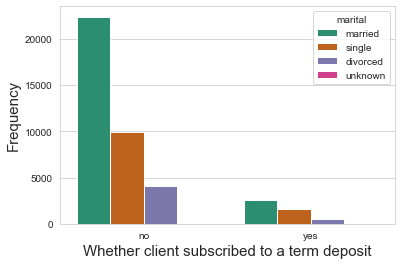

In [10]:
# Examining the distribution of the response variable grouped by client's marital status

ploty_job = sns.countplot(x='y', hue='marital', data=Marketing_data, palette='Dark2')
ploty_job.set_xlabel('Whether client subscribed to a term deposit',fontsize=15);
ploty_job.set_ylabel('Frequency',fontsize=15)

plt.savefig('ploty_marital', dpi = 600)

Also, it appears marital status isn't a significant predictor of whether a client would subscribe or not subscribe to a term deposit.

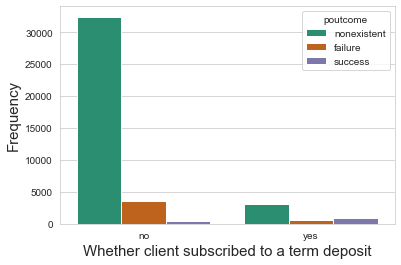

In [11]:
# Examining the distribution of the response variable grouped by outcome of the previous marketing campaign

ploty_poutcome = sns.countplot(x='y', hue='poutcome', data=Marketing_data, palette='Dark2')
ploty_poutcome.set_xlabel('Whether client subscribed to a term deposit',fontsize=15);
ploty_poutcome.set_ylabel('Frequency',fontsize=15)

plt.savefig('ploty_poutcome', dpi = 600)


The plot above shows that clients who subscribed following the previous marketing campaign are more likely to subscribe again following the current campaign.

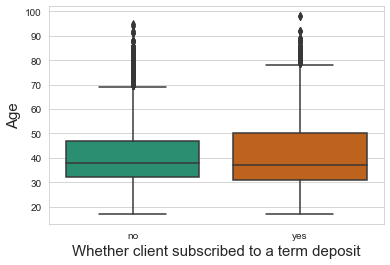

In [12]:
# Examining the age distribution of clients based on their response to the marketing campaign

ploty_age = sns.boxplot(x="y", y="age", data=Marketing_data,palette='Dark2')
ploty_age.set_xlabel('Whether client subscribed to a term deposit',fontsize=15);
ploty_age.set_ylabel('Age',fontsize=15)

plt.savefig('ploty_age', dpi = 600)

With the median age of both response groups fairly equal, it appears age is not a significant predictor of whether a client subscribes to a term deposit. Although, it appears much older clients might be more inclined to subscribe due to higher 75 percent percentile and maximum age for the subscribed category.

We can plot a histogram of client ages as follows:

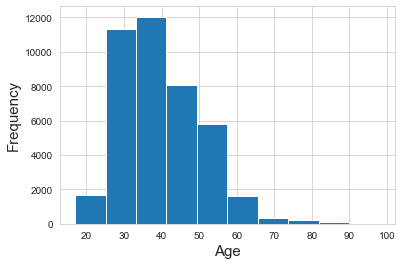

In [14]:
# Histogram of client ages

plot_age = Marketing_data['age'].plot.hist()
plot_age.set_xlabel('Age',fontsize=15);
plot_age.set_ylabel('Frequency',fontsize=15)

plt.savefig('plot_age', dpi = 600)


The histogram indicates that most of the clients surveyed are about 40 years old.

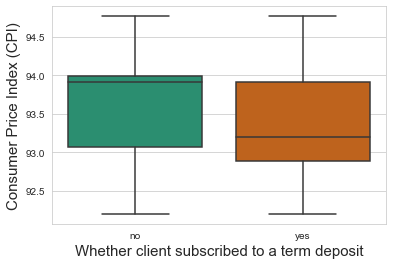

In [15]:
# Examining the age distribution of clients based on their response to the marketing campaign

ploty_infl = sns.boxplot(x="y", y="cons.price.idx", data=Marketing_data,palette='Dark2')
ploty_infl.set_xlabel('Whether client subscribed to a term deposit',fontsize=15);
ploty_infl.set_ylabel('Consumer Price Index (CPI)',fontsize=15)

plt.savefig('ploty_infl', dpi = 600)

The boxplot above suggests that clients are more likely to subscribe to a term deposit when the consumer price index is lower rather than higher. The consumer price index is a measure of inflation and an inflationary environment tend to favor borrowers rather than savers.

**Data cleaning**

Now, I would try to clean the data before modelling the relationship between the tendency of clients to be receptive of the marketing campaign (that is to subscribe to a term deposit) and 20 possible explanatory variables.

First, as the question specifies that last contact duration (duration variable) isn't known in advance and to avoid look ahead bias has to be dropped.

In [16]:
# Dropping the duration variable

Marketing_data.drop('duration',axis=1,inplace=True)

Next, I would like to transform the binary response variable into zeros and ones, with ones for yes and zeros for no.

First, I would create a simple function to do that and then apply that function to each row of data.

In [17]:
# Defining a function to transform binary response variable into zeros and ones

def trans_bin(x):
    if x == 'yes':
        return 1
    else:
        return 0

In [18]:
# Adding a new column to represent the binary response variable coded as zeros and ones

Marketing_data['y_response'] = Marketing_data['y'].apply(trans_bin)

Also, the categorical variables - default, housing and loan have similar outputs, and to avoid confusion I decided to modify their outputs to reflect which particular variable it belongs.

In [19]:
Marketing_data['default_new'] = 'default' + '_' + Marketing_data['default']
Marketing_data['housing_new'] = 'housing' + '_' + Marketing_data['housing']
Marketing_data['loan_new'] = 'loan' + '_' + Marketing_data['loan']

Next, I would like to drop some other columns to reduce redundancy. For example, there are only three rows of data for clients with credit in default, hence that variable wouldn't have much impact on the response variable. Also the variable - campaign includes information contained in the variable - previous. Hence, it makes sense to drop 'previous' to avoid multicollinearity. 

In [20]:
# Dropping some column variables

Marketing_data.drop(['default','default_new','housing','loan', 'previous'],axis=1,inplace=True)

In [21]:
# Checking to see what the data looks like now

Marketing_data.head()

,age,job,marital,education,contact,month,day_of_week,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y,y_response,housing_new,loan_new
0,56,housemaid,married,basic.4y,telephone,may,mon,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no,0,housing_no,loan_no
1,57,services,married,high.school,telephone,may,mon,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no,0,housing_no,loan_no
2,37,services,married,high.school,telephone,may,mon,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no,0,housing_yes,loan_no
3,40,admin.,married,basic.6y,telephone,may,mon,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no,0,housing_no,loan_no
4,56,services,married,high.school,telephone,may,mon,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no,0,housing_no,loan_yes


**Evaluating performance of the deployed model**

Before any further cleaning, I'd like to evaluate performance of the current model based on a classication report and a confusion matrix. But first, the numeric model prediction values have to be transformed into a binary response type zeros and ones.

In [22]:
# Creating a function to encode prediction probabilities greater than 0.5 as one, and those not as zero

def trans_prob(x):
    if x > 0.5:
        return 1
    else:
        return 0

In [23]:
# Applying the function to create a new column of model predictions

Marketing_data['ModelPrediction2'] = Marketing_data['ModelPrediction'].apply(trans_prob)

In [24]:
# Importing the classification_report function

from sklearn.metrics import classification_report

# Printing the classification report

print(classification_report(Marketing_data['y_response'], Marketing_data['ModelPrediction2']))

              precision    recall  f1-score   support

           0       0.27      0.01      0.01     36548
           1       0.10      0.85      0.18      4640

    accuracy                           0.10     41188
   macro avg       0.19      0.43      0.10     41188
weighted avg       0.25      0.10      0.03     41188



In [25]:
# Importing the confusion matrix function

from sklearn.metrics import confusion_matrix

# Printing the confusion matrix

print(confusion_matrix(Marketing_data['y_response'], Marketing_data['ModelPrediction2']))

[[  257 36291]
 [  680  3960]]


In [48]:
# Estimating classification accuracy: percentage of correct predictions

from sklearn import metrics

print(metrics.accuracy_score(Marketing_data['y_response'], Marketing_data['ModelPrediction2']))

0.1023841895697776


In [49]:
# Estimating null accuracy value

max(Marketing_data['y_response'].mean(), 1 - Marketing_data['y_response'].mean())

0.8873458288821987

*Interpreting classication accuracy*

The classication accuracy score estimates the percentage of correct predictions of both yes and no for the response variable. The estimate above suggests a very low accuracy for the deployed model. But this accuracy value of 10% has to be compared to the null accuracy value. The null accuracy value is the accuracy that would result from predicting the dominant class 100% of the time. In other words, what is the best we can do without any model. The null accuracy value of 88.7% suggests that we might be better off overall without the model since the null model has a far higher accuracy.

However, the accuracy value can be grossly misleading, particularly for unbalanced data sets, such as the bank marketing data set, with far greater number of zeros then ones. This is because the null model while having a higher accuracy would certainly be wrong in predicting the probability of a yes outcome, while the deployed model would be correct on some occasions, which leads me to the consideration of other model evaluation metrics such as precision, recall and f1-score.

*Interpreting model precision, recall and f1-score from the classication report and confusion matrix*

The confusion matrix indicates that the deployed model correctly predicted yes and no, 3960 and 257 times respectively; while incorrectly predicting yes and no, 36291 and 680 times respectively. These values are referred to as True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN). 

However, these numbers are best applied in the context of total predictions made using metrics such as precision, recall and f1-score.

As we are more interested in the tendency of a client subscribing to a term deposit following a marketing campaign, I would focus my interpretation of these metrics for yes predictions by the deployed model.

Precision is a measure of how often the prediction is correct when a yes is predicted. The classification report suggests a low precision value of 0.1. Recall is a measure of how often the prediction is correct when the actual value is yes. Conversely, the classification report indicate a high recall value of 0.85 for the deployed model. 

Finally, since there is a conflict between both precision and recall and having high values for both is desired, the f1-score is also considered as a model evaluation metric. The f1-score is the weighted harmonic mean of both precision and recall. The classification report indicate a low f1-score of 0.18.

Hence, it can be concluded that the deployed model isn't reliable in predicting the outcome of the bank marketing campaign.

Next, I would proceed to further preparing the data for use in creating a potentially better model.

**Pre-modeling data preparation**

At this point a decision has to be made about an appropriate approach to modelling the data.

As the response variable is binary, a useful starting point is a logistic regression.

To do this, we first need to convert the categorical variables into numeric type variables.

I attempt to do this using dummies as follows:

In [27]:
# Creating dummies for each categorical variable

Job = pd.get_dummies(Marketing_data['job'],drop_first=True)
Marital = pd.get_dummies(Marketing_data['marital'],drop_first=True)
Education = pd.get_dummies(Marketing_data['education'],drop_first=True)
Contact = pd.get_dummies(Marketing_data['contact'],drop_first=True)
Month = pd.get_dummies(Marketing_data['month'],drop_first=True)
Day_of_week = pd.get_dummies(Marketing_data['day_of_week'],drop_first=True)
Poutcome = pd.get_dummies(Marketing_data['poutcome'],drop_first=True)
Housing_new = pd.get_dummies(Marketing_data['housing_new'],drop_first=True)
Loan_new = pd.get_dummies(Marketing_data['loan_new'],drop_first=True)

In [28]:
# Dropping the original categorical variables from the dataset and saving it into a new dataframe

Marketing_logreg = Marketing_data.drop(['job','marital','education','contact',
                                    'month','day_of_week','poutcome','housing_new',
                                    'loan_new'],axis=1)

In [29]:
# Adding the dummies to the new dataframe

Marketing_logreg = pd.concat([Marketing_logreg,Job,Marital, Education, Contact, Month, Day_of_week,
                  Poutcome, Housing_new, Loan_new],axis=1)

Finally, I'll drop the initial y variable and model predictions.

In [30]:
# Dropping initial y and model prediction columns

Marketing_logreg.drop(['y','ModelPrediction', 'ModelPrediction2'],axis=1,inplace=True)

In [31]:
# Checking to see what the cleaned dataframe looks like

Marketing_logreg.head()

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_response,blue-collar,...,mon,thu,tue,wed,nonexistent,success,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,57,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,37,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,40,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,56,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,0,0,0,1


Now that all the rows of data are numeric, we can go ahead and build a logistic regression model.

**Building a Logistic Regression model**

In [32]:
# Importing the train test split function

from sklearn.model_selection import train_test_split

In [33]:
# Splitting the data into training and test datasets in a 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(Marketing_logreg.drop('y_response',axis=1), 
                                                    Marketing_logreg['y_response'], test_size=0.30)

In [34]:
# Loading the logistic regression function

from sklearn.linear_model import LogisticRegression

In [35]:
# Creating an instance of a logistic regression model and fitting the training data to it

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\eyita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Creating predictions for the test data set

logreg_predictions = logmodel.predict(X_test)

**Evaluating performance of the Logistic Regression model**

In [37]:
# Printing the classification report

print(classification_report(y_test,logreg_predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.71      0.19      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [46]:
# Printing the confusion matrix

print(confusion_matrix(y_test,logreg_predictions))

[[10875   106]
 [ 1120   256]]


In [50]:
# Estimating classification accuracy: percentage of correct predictions

print(metrics.accuracy_score(y_test,logreg_predictions))

0.9007849801731812


In [51]:
# Estimating null accuracy value

max(y_test.mean(), 1 - y_test.mean())

0.88864611151574

Similar to the deployed model, the logistic regression also has a very low accuracy score. In contrast, however, it has a higher precision value of 0.71, but a much lower recall value of 0.19. Overall, the logistic regression has a higher f1-score of 0.29, which is still very low but may make the model preferable to the deployed model.